In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import dabest

%matplotlib inline

/home/singuyen/anaconda3/envs/biosignal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/singuyen/anaconda3/envs/biosignal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/singuyen/anaconda3/envs/biosignal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


All records of IncartDb have sampling frequency of 257 Hz (as stated on their website) <br>
All records of NsrDb have sampling frequency of 128 Hz (checked by the below code)

```python
import wfdb

database="nsrdb"
database_dir = '../nsrDb/'
record_ids = wfdb.get_record_list(database)

for id in record_ids:                                                       
    record_path = database_dir + id                                         
    fs = wfdb.rdrecord(record_path).__dict__['fs']                          
    print(fs) 
```

In [5]:
def HR_estimating(qrs_inds, fs):
    d = np.ediff1d(qrs_inds) # distances in # of samples between consecutive detected peaks
    D = d/fs # distances in second between consecutive detected peaks
    HR = np.mean(60/D) # heart rate in beat per minute
    return [D, HR]    

# IncartDb

In [3]:
incart = pickle.load(open("incartDb_summary.pickle", "rb"))

print(incart.shape)
incart.head()

(55, 13)


,record_id,ref_annotation,test_annotation,matched_ref_inds,matched_test_inds,unmatched_ref_inds,unmatched_test_inds,true_positive,false_positive,false_negative,specificity,positive_predictivity,FPR
0,I01,"[114, 277, 442, 608, 710, 941, 1106, 1269, 143...","[125, 288, 453, 617, 951, 1116, 1280, 1442, 16...","[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 16, 32, 52, 67, 100, 108, 113, 118, 139, 1...",[2413],2413.0,1.0,344.0,0.875227,0.999586,0.000414
1,I02,"[11, 192, 375, 487, 586, 746, 931, 1119, 1305,...","[23, 203, 386, 596, 757, 942, 1129, 1316, 1526...","[0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 9, 16, 23, 36, 41, 47, 54, 61, 69, 76, 81,...",[],2444.0,0.0,230.0,0.913987,1.000000,0.000000
2,I03,"[0, 172, 344, 519, 698, 878, 1059, 1243, 1430,...","[19, 179, 351, 526, 705, 885, 1066, 1250, 1437...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[143, 145, 147, 149, 151, 153, 155, 157, 159, ...","[1409, 1466]",2366.0,2.0,86.0,0.964927,0.999155,0.000845
3,I04,"[-11, 187, 393, 611, 834, 1059, 1292, 1529, 17...","[19, 194, 399, 617, 841, 1066, 1298, 1535, 176...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 57, 168, 195, 367, 452, 492, 728, 729, 752...",[0],2349.0,1.0,75.0,0.969059,0.999574,0.000426
4,I05,"[88, 346, 612, 873, 1142, 1419, 1692, 1969, 22...","[95, 353, 619, 880, 1149, 1425, 1699, 1976, 22...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[35, 104, 148, 149, 173, 198, 228, 253, 295, 3...",[],1612.0,0.0,164.0,0.907658,1.000000,0.000000


In [23]:
heart_rate1 = incart[['record_id']].copy()
heart_rate1['class'] = 'Healthy'

heart_rate1['D'] = incart['test_annotation'].apply(lambda x: HR_estimating(x, 257)[0])
heart_rate1['HR'] = incart['test_annotation'].apply(lambda x: HR_estimating(x, 257)[1])

heart_rate1.head()

,record_id,class,D,HR
0,I01,Healthy,"[0.6342412451361867, 0.642023346303502, 0.6381...",86.198527
1,I02,Healthy,"[0.7003891050583657, 0.7120622568093385, 0.817...",83.806601
2,I03,Healthy,"[0.622568093385214, 0.669260700389105, 0.68093...",80.741301
3,I04,Healthy,"[0.6809338521400778, 0.7976653696498055, 0.848...",84.877931
4,I05,Healthy,"[1.0038910505836576, 1.0350194552529184, 1.015...",56.593292


In [24]:
heart_rate1['HR'].describe()

count     55.000000
mean      74.161144
std       13.833910
min       48.671453
25%       63.341071
50%       74.091564
75%       85.279172
max      101.294666
Name: HR, dtype: float64

# NsrDb

In [20]:
nsr = pickle.load(open("nsrDb_summary.pickle", "rb"))

print(nsr.shape)
nsr.head()

(15, 13)


,record_id,ref_annotation,test_annotation,matched_ref_inds,matched_test_inds,unmatched_ref_inds,unmatched_test_inds,true_positive,false_positive,false_negative,specificity,positive_predictivity,FPR
0,16265,"[1, 52, 129, 207, 284, 364, 442, 522, 598, 675...","[58, 135, 213, 291, 370, 448, 527, 604, 682, 7...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 479, 488, 509, 519, 840, 842, 844, 846, 84...","[3563, 4751, 9010, 17586, 20111, 20352, 23401,...",100231.0,15.0,724.0,0.992828,0.999850,0.000150
1,16273,"[9, 87, 164, 241, 319, 397, 476, 557, 641, 723...","[15, 93, 171, 248, 325, 403, 482, 564, 647, 73...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[54, 242, 247, 249, 252, 411, 416, 423, 508, 5...",[5239],89784.0,1.0,313.0,0.996526,0.999989,0.000011
2,16420,"[68, 148, 228, 309, 391, 474, 557, 643, 727, 8...","[75, 156, 235, 317, 399, 481, 565, 651, 735, 8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[307, 308, 318, 320, 334, 387, 396, 2786, 2794...",[],101846.0,0.0,590.0,0.994240,1.000000,0.000000
3,16483,"[18, 99, 178, 257, 337, 417, 497, 577, 657, 73...","[19, 102, 182, 261, 340, 420, 500, 580, 660, 7...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[60, 91, 103, 154, 421, 429, 1276, 1433, 1440,...",[51446],104322.0,1.0,239.0,0.997714,0.999990,0.000010
4,16539,"[72, 168, 268, 364, 454, 543, 636, 746, 866, 9...","[76, 172, 273, 369, 458, 548, 642, 751, 871, 9...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[272, 279, 551, 565, 568, 575, 816, 823, 828, ...",[],107899.0,0.0,775.0,0.992869,1.000000,0.000000


In [21]:
N = 128*30*60 # Number of samples in 30 min

heart_rate2 = nsr[['record_id']].copy().astype(str)
heart_rate2['class'] = 'Diseased'

heart_rate2['D'] = nsr['test_annotation'].apply(lambda x: HR_estimating(x[x <= N], 257)[0])
heart_rate2['HR'] = nsr['test_annotation'].apply(lambda x: HR_estimating(x[x <= N], 257)[1])

heart_rate2.head()

,record_id,class,D,HR
0,16265,Diseased,"[0.29961089494163423, 0.3035019455252918, 0.30...",183.935147
1,16273,Diseased,"[0.3035019455252918, 0.3035019455252918, 0.299...",170.381104
2,16420,Diseased,"[0.3151750972762646, 0.30739299610894943, 0.31...",168.752912
3,16483,Diseased,"[0.3229571984435798, 0.311284046692607, 0.3073...",185.171879
4,16539,Diseased,"[0.3735408560311284, 0.39299610894941633, 0.37...",178.175317


In [22]:
heart_rate2['HR'].describe()

count     15.000000
mean     172.306242
std       22.673996
min      132.644535
25%      160.667866
50%      170.381104
75%      184.553513
max      214.963770
Name: HR, dtype: float64

# Big table and Statistical Analysis

In [25]:
heart_rate = pd.concat([heart_rate1, heart_rate2])

  reference_group experimental_group  stat_summary  bca_ci_low  bca_ci_high  \
0         Healthy           Diseased     98.145098   86.169389   109.668431   

     ci  is_difference  is_paired  pvalue_2samp_ind_ttest  pvalue_mann_whitney  
0  95.0           True      False            2.045610e-31         3.701527e-09  


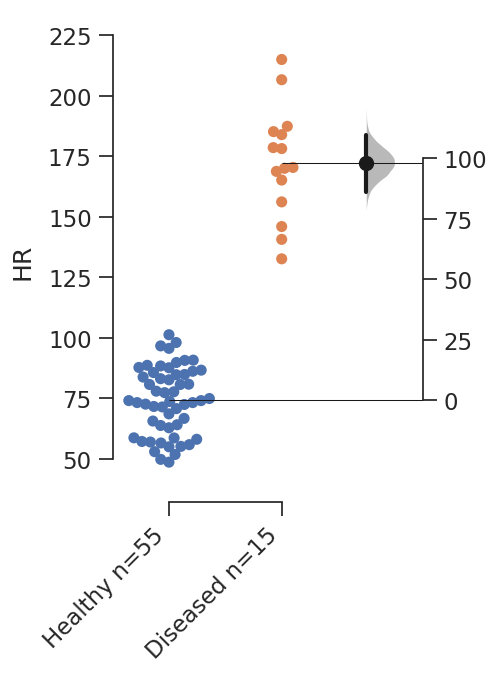

In [30]:
fig1, stat1 = dabest.plot(heart_rate, x='class', y='HR', idx=('Healthy','Diseased'))

print(stat1)